In [1]:
import pandas as pd
import numpy as np
import sys
from scipy.stats import chi2, norm
import matplotlib.pyplot as plt
from scipy.stats import shapiro, anderson

np.set_printoptions(precision = 7, threshold = sys.maxsize)
np.set_printoptions(linewidth = np.inf)

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)
pd.set_option('precision', 10)
pd.options.display.float_format = '{:,.7e}'.format

In [2]:
data = pd.read_excel("WeightDiary.xlsx", engine="openpyxl")
data["Month"]= data.Date.dt.month_name()
data["DayOfWeek"] = data.Date.dt.day_name()
data["Month"] = data['Month'].astype('category')
data["Month"] = data["Month"].cat.reorder_categories(['January', 'February', 'March', 'April', 'May', 
                          'June', 'July', 'August', 'September', 'October', 'November', 'December'])

data["DayOfWeek"] = data["DayOfWeek"].astype("category")
data["DayOfWeek"] = data["DayOfWeek"].cat.reorder_categories(['Sunday', 'Monday', 'Tuesday',
                                                              'Wednesday', 'Thursday', 'Friday', 'Saturday'])
data.head()

,Date,Weight,Month,DayOfWeek
0,2017-03-04,2.0970000e+02,March,Saturday
1,2017-03-04,2.1240000e+02,March,Saturday
2,2017-03-05,2.1000000e+02,March,Sunday
3,2017-03-05,2.1430000e+02,March,Sunday
4,2017-03-06,2.0910000e+02,March,Monday


# Q1

## (a)

In [3]:
data["Month"].value_counts()

March        115
April        112
May          105
June          98
December      90
October       86
September     85
November      83
July          82
August        72
January       60
February      56
Name: Month, dtype: int64

In [4]:
data["DayOfWeek"].value_counts()

Thursday     154
Tuesday      153
Wednesday    151
Monday       148
Sunday       147
Saturday     146
Friday       145
Name: DayOfWeek, dtype: int64

## (b)

In [5]:
import Regression
X = pd.DataFrame({"Intercept":[1]*data.shape[0]})
param_name = X.columns
y = data['Weight']
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  22360.22950193286


## (c)

In [6]:
X = pd.get_dummies(data[["Month"]])
X.insert(0, 'Intercept', 1)
param_name = X.columns
y = data['Weight']
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  17776.054171950123


## (d)

In [7]:
X = pd.get_dummies(data[["DayOfWeek"]])
X.insert(0, 'Intercept', 1)
param_name = X.columns
y = data['Weight']
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  22239.170445402047


## (e)

In [8]:
print('Generalized Inverse of XtX')
print(XtX_Ginv)

Generalized Inverse of XtX
[[ 0.0068493 -0.0068493 -0.0068493 -0.0068493 -0.0068493 -0.0068493 -0.0068493  0.       ]
 [-0.0068493  0.013652   0.0068493  0.0068493  0.0068493  0.0068493  0.0068493  0.       ]
 [-0.0068493  0.0068493  0.0136061  0.0068493  0.0068493  0.0068493  0.0068493  0.       ]
 [-0.0068493  0.0068493  0.0068493  0.0133853  0.0068493  0.0068493  0.0068493  0.       ]
 [-0.0068493  0.0068493  0.0068493  0.0068493  0.0134718  0.0068493  0.0068493  0.       ]
 [-0.0068493  0.0068493  0.0068493  0.0068493  0.0068493  0.0133428  0.0068493  0.       ]
 [-0.0068493  0.0068493  0.0068493  0.0068493  0.0068493  0.0068493  0.0137459  0.       ]
 [ 0.         0.         0.         0.         0.         0.         0.         0.       ]]


In [ ]:
XtX_Ginv_1 = pandas.DataFrame(XtX_Ginv)

In [ ]:
XtX_Ginv_1

## (f)

In [9]:
X = pd.get_dummies(data[["Month", "DayOfWeek"]])
X.insert(0, 'Intercept', 1)
param_name = X.columns
y = data['Weight']
b, residual_SS, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y)
print('Residual Sum of Squares = ', residual_SS)

Residual Sum of Squares =  17665.565952541096


## (g)

Weight ~ Intercept + Month + DayOfWeek

## (h)

In [10]:
print('Aliased Parameter', param_name[aliasParam])
len(aliasParam)+len(nonAliasParam)

Aliased Parameter Index(['Month_December', 'DayOfWeek_Saturday'], dtype='object')


20

There are two aliased parameters and 18 parameters

## (i)

In [11]:
beta = pd.Series(b, index = param_name)
print('Parameter Estimates')
print(beta)

Parameter Estimates
Intercept              2.1122573e+02
Month_January         -4.4054252e+00
Month_February        -4.8239659e+00
Month_March           -2.8253761e+00
Month_April           -4.2731582e+00
Month_May             -6.4393219e+00
Month_June            -7.1583571e+00
Month_July            -7.1115251e+00
Month_August          -4.8223766e+00
Month_September       -4.0327408e+00
Month_October         -3.3379674e+00
Month_November        -1.5751820e+00
Month_December         0.0000000e+00
DayOfWeek_Sunday       3.9628664e-01
DayOfWeek_Monday       6.6924303e-01
DayOfWeek_Tuesday      7.3832484e-02
DayOfWeek_Wednesday   -1.9775855e-01
DayOfWeek_Thursday    -3.0878554e-01
DayOfWeek_Friday      -1.7015053e-01
DayOfWeek_Saturday     0.0000000e+00
dtype: float64


# Q2

## (a)

<AxesSubplot:title={'center':'Residuals'}, xlabel='Month'>

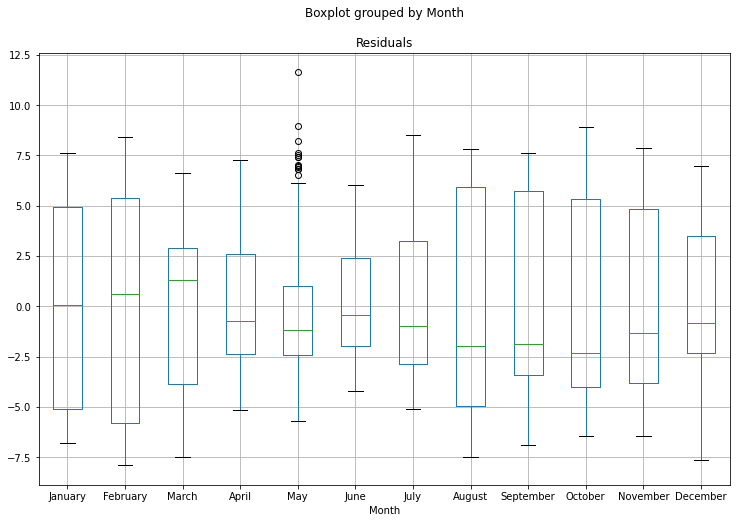

In [12]:
pred_y = np.matmul(X, b)
resid_y = y - pred_y
data["Residuals"] = resid_y
data.boxplot(column="Residuals", by="Month", figsize=(12, 8))

The variances are not equal in each month.

<AxesSubplot:title={'center':'Residuals'}, xlabel='DayOfWeek'>

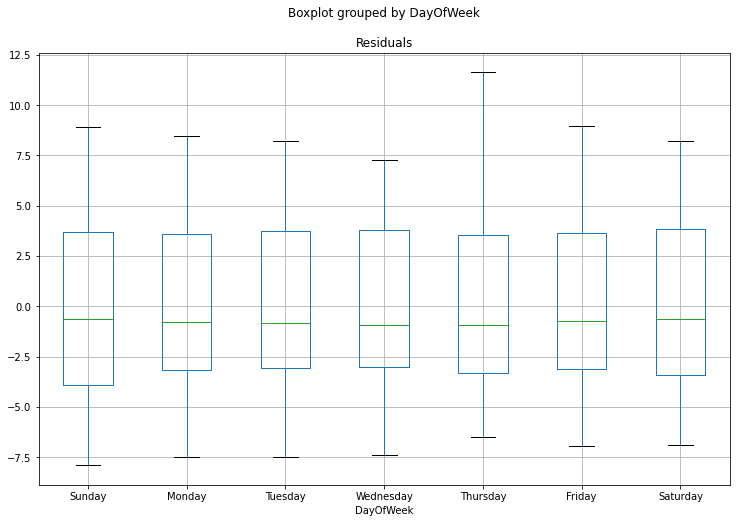

In [13]:
data.boxplot(column="Residuals", by="DayOfWeek", figsize=(12, 8))

The variances are approximately equal in each day of week.

## (b)

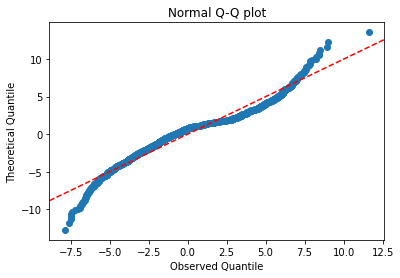

In [14]:
y_new = pd.Series(resid_y * resid_y, name = 'Square_Residual')
n_obs = len(y_new)
b, SSE0, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X[['Intercept']], y_new)
b, SSE1, XtX_Ginv, aliasParam, nonAliasParam = Regression.RegModel(X, y_new)

obs_quantile = np.sort(resid_y)
z_p = np.array(range(n_obs))
z_p = (1.0 + z_p) / (n_obs + 0.5)
z_quantile = norm.ppf(z_p, loc = np.mean(obs_quantile), scale = np.std(obs_quantile))

plt.scatter(obs_quantile, z_quantile)
plt.title("Normal Q-Q plot")
plt.xlabel("Observed Quantile")
plt.ylabel("Theoretical Quantile")
plt.axline((0,0), slope = 1, color = 'red', linestyle = '--')
plt.show()

In [15]:
anderson_test = anderson(resid_y, dist = 'norm')
print('  Anderson Test = ', anderson_test[0])
print('Critical Values = ', anderson_test[1])
print('       p-values = ', anderson_test[2]/100.0)


  Anderson Test =  15.636691540377115
Critical Values =  [0.574 0.654 0.784 0.915 1.088]
       p-values =  [0.15  0.1   0.05  0.025 0.01 ]


The anderson test statistic is greater than the critical value, so we can reject the null hypothesis, the normality assumption is not satisfied.

## (c)

In [16]:
#Breusch-Pagan Test
r_squared = 1.0 - (SSE1 / SSE0)
breusch_test = n_obs * r_squared
breusch_df = len(nonAliasParam) - 1
breusch_pvalue = chi2.sf(breusch_test, breusch_df)
print("test statistic:", breusch_test)
print("df:",breusch_df )
print("p-value:", breusch_pvalue)

test statistic: 209.35170433062734
df: 17
p-value: 3.74507458598216e-35


In [17]:
#White Test
from statsmodels.compat import lzip

from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd

X_white=pd.get_dummies(data[["Month", "DayOfWeek"]])
y_white=data["Residuals"]
X_white.insert(0,"Intercept",1)
white_test_statistics=het_white(y_white,X_white)[0]
white_test_pvalue= het_white(y_white,X_white)[1]

In [2]:
print("test statistic:",white_test_statistics)
print("p-value:", white_test_pvalue)


test statistic: 233.2818239759793
p-value: 3.3282382921650404e-16


The p-value is close to zero, so there is evidence of non-homogenous variance

## (d)

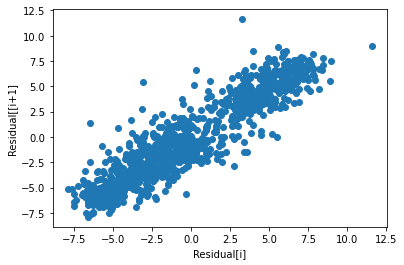

Autocorrelation =  0.9199539086078399
Durbin-Watson Test 0.1600779864874749


In [21]:
# Durbin-Watson Test of Autocorrelation
z1 = resid_y[0:(n_obs-1)].to_numpy()
z2 = resid_y[1:n_obs].to_numpy()
z12_corr = np.corrcoef(z1, z2)
plt.scatter(z1, z2)
plt.xlabel('Residual[i]')
plt.ylabel('Residual[[i+1]')
plt.show()
print('Autocorrelation = ', z12_corr[0,1])
durbin_watson_test = np.sum((z1-z2)**2) / np.sum(resid_y**2)
print('Durbin-Watson Test', durbin_watson_test)

There is evidence of autocorrelation among observations.

## (e)

In [25]:
import pandas as pd
import itertools
import statsmodels.formula.api as smf
import numpy as np

In [26]:
def _pred_Contribution(df,sequence,x):
    Sq = list(sequence)
    idx = Sq.index(x) +1 
    out = df[df['Predictor Sequence']  == tuple(sequence)][f'Predictor_{idx}_Enters'] 
    if idx == 1:
        return out 
    else:
        return out -  df[df['Predictor Sequence']  == tuple(sequence)][f'Predictor_{idx-1}_Enters'] 
    

def Pred_Contributions(df,x):
    out = []
    for idx in df.index:
        row = df.iloc[idx] 
        out.append(float(_pred_Contribution(df,row['Predictor Sequence'],x)))
    return out

class SV_OLS:
    "This Class is dedicated for calculating the Shapely Value of a simple linear regression"
    def __init__(self,data,Y_name,X_names):
        self.data = data
        self.Y_name = Y_name
        self.X_names = X_names
        self.Fetch_combs()
    
    def Fetch_combs(self):
        Regressors = self.X_names
        OUT = {0:''}
        for N in range(1,len(Regressors)+1):
            OUT[N] = [i for i in itertools.combinations(Regressors,N)]
        self.combs = OUT
        
    def formulate(self,lst):
        out = self.Y_name + ' ~ 1'
        for i in lst:
            out += f' + {i}'
        return out

    def Contribution(self,candidates):
        mod = smf.ols(self.formulate(candidates),self.data)
        mod = mod.fit()
        return mod.rsquared
    
    def get_R_table(self):
        R_table = {('1'):T.Contribution('1')}
        for N in self.combs:
            for comb in self.combs[N]:
                R_table[comb] = T.Contribution(comb)
        return R_table
    
    def _get_df(self):
        #Get the permutation of grandcolision 
        Perms = [i for i in itertools.permutations(T.X_names,r=len(T.X_names))]
        #Create Framework
        _dat =  {'Predictor Sequence':[]}
        count = 0
        for x in self.X_names:
            count += 1 
            _dat[f'Predictor_{count}_Enters'] = []
        df = pd.DataFrame(data = _dat)
        #Populate values:
        for perm in Perms:
            temp_mod = set()
            row = [tuple(perm)]
            for p in perm:
                temp_mod.add(p)
                #print(R_tab[tuple(temp_mod)])
                row.append(self.Contribution(tuple(temp_mod)))
            df.loc[len(df.index)] = row
        return df
    
    def Get_SV_table(self):
        df = self._get_df()
        for x in self.X_names:
            df[x] = Pred_Contributions(df,x)
        return df
    
    def SV_Values(self):
        _df = self.Get_SV_table()
        out = dict()
        for x in self.X_names:
            out[x] = [np.average(_df[x])]
        return pd.DataFrame(out,index = ['Shapley Value'])
        
    

In [27]:
T = SV_OLS(data,'Weight ',['Month', 'DayOfWeek'])
df = T.Get_SV_table()
df

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Predictor Sequence,Predictor_1_Enters,Predictor_2_Enters,Month,DayOfWeek
0,"(Month, DayOfWeek)",2.0501468e-01,2.0995596e-01,2.0501468e-01,4.9412829e-03
1,"(DayOfWeek, Month)",5.4140346e-03,2.0995596e-01,2.0454193e-01,5.4140346e-03


In [28]:
SVs = T.SV_Values()
SVs

D:\Anaconda\lib\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


,Month,DayOfWeek
Shapley Value,2.0477831e-01,5.1776588e-03


In [29]:
# the Percent Shapley values of the two predictors
np.round(SVs.loc['Shapley Value']/sum(SVs.loc['Shapley Value']), 2)
# the percent of month is 0.98, the percent of Day of week is 0.02.

Month       9.8000000e-01
DayOfWeek   2.0000000e-02
Name: Shapley Value, dtype: float64

In [30]:
sum(SVs.loc['Shapley Value'])

0.20995596440365605

In [31]:
T.get_R_table()

{'1': 0.0,
 ('Month',): 0.20501468151533875,
 ('DayOfWeek',): 0.005414034614362295,
 ('Month', 'DayOfWeek'): 0.20995596440365605}

In [26]:
per_M=0.20501468151533875/(0.20477831+0.0051776588)
per_DoW=0.0051776588/(0.20477831+0.0051776588)